In [0]:
#for installing bigquery client
#!pip install --upgrade google-cloud-bigquery

In [0]:
#installing biquery helper package
#!pip install -e git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper

In [0]:
#authentication 
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'C:\Users\Harini Pravin\Downloads\My First Project-afe1694bf25a.json'

In [4]:
#authenting in google colab
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
project_id = 'brave-iterator-235513'
from google.cloud.bigquery.client import Client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [0]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#creating a reference for dataset
pat_dataset_ref = client.dataset('google_patents_research', project='patents-public-data')
pat_dset = client.get_dataset(pat_dataset_ref)

In [8]:
#listing out tables in the google_patents_research database
[x.table_id for x in client.list_tables(pat_dset)]

['publications',
 'publications_201710',
 'publications_201802',
 'publications_201809']

In [0]:
#table_ref = pat_dataset_ref.table("publications_201802")
#table = client.get_table(table_ref)
#df = client.list_rows(table).to_dataframe()
#df = client.query(sql).to_dataframe()

In [10]:
#selecting 200000 records from the publications_201802 table
sample_count = 200000
row_count = client.query('''
  SELECT 
    COUNT(*) as total
  FROM `patents-public-data.google_patents_research.publications_201802`''').to_dataframe().total[0]

patent = client.query('''
  SELECT
    *
  FROM
    `patents-public-data.google_patents_research.publications_201802`
  WHERE RAND() < %d/%d
''' % (sample_count, row_count)).to_dataframe()

print('Full dataset has %d rows' % row_count)
print('our sampled dataset has %d rows' % sample_count)

Full dataset has 96018448 rows
our sampled dataset has 200000 rows


In [11]:
#estimating the query size.
#The query processed 240 GB of data
job_config = bigquery.QueryJobConfig()
job_config.dry_run = True
job_config.use_query_cache = False
query_job = client.query(
    (
        '''
  SELECT
    *
  FROM
    `patents-public-data.google_patents_research.publications_201802`
  WHERE RAND() < %d/%d
''' % (sample_count, row_count)
    ),
    job_config=job_config,
)  # API request

# A dry run query completes immediately.
assert query_job.state == "DONE"
assert query_job.dry_run

print("This query processed {} bytes.".format(query_job.total_bytes_processed))

This query processed 240130957742 bytes.


In [12]:
#printing the first 5 rows of patent dataset
patent.head()

,publication_number,title,title_translated,abstract,abstract_translated,cpc,cpc_low,cpc_inventive_low,top_terms,similar,url,country,publication_description,cited_by,embedding_v1
0,ES-1034999-Y,"enrrollable, changeable, and automontable scre...",True,,False,"[{'code': 'A47K3/38', 'inventive': True, 'firs...","[A47K3/38, A47K3/28, A47K3/00, A47K, A47, A]","[A47K3/38, A47K3/28, A47K3/00, A47K, A47, A]",[],"[{'publication_number': 'DE-29622130-U1', 'app...",https://patents.google.com/patent/ES1034999Y,SPAIN,Utility model,[],"[0.104362644, -0.099946536, -0.20470996, -0.14..."
1,DE-1171469-B,Wireline simultaneous interpretation system an...,True,,False,"[{'code': 'H01B7/08', 'inventive': True, 'firs...","[H01B7/08, H01B7/00, H01B, H01, H, H01R25/14, ...","[H01B7/08, H01B7/00, H01B, H01, H, H01R25/14, ...",[],"[{'publication_number': 'DE-1609328-A1', 'appl...",https://patents.google.com/patent/DE1171469B,FEDERAL REPUBLIC GERMANY,Auslegeschirft,"[{'publication_number': 'WO-9603788-A1', 'appl...","[0.20756403, 0.050636813, 0.018561073, 0.06757..."
2,DE-1158248-B,Stabilizing halogen-containing polymers,True,,False,"[{'code': 'C08K5/11', 'inventive': True, 'firs...","[C08K5/11, C08K5/10, C08K5/04, C08K5/00, C08K,...","[C08K5/11, C08K5/10, C08K5/04, C08K5/00, C08K,...",[],"[{'publication_number': 'DE-1113439-B', 'appli...",https://patents.google.com/patent/DE1158248B,FEDERAL REPUBLIC GERMANY,Auslegeschirft,[],"[0.14131883, -0.0764678, -0.06755722, -0.01936..."
3,DE-1286318-B,Card sorting device,True,,False,"[{'code': 'G06F7/22', 'inventive': True, 'firs...","[G06F7/22, G06F7/00, G06F, G06, G]","[G06F7/22, G06F7/00, G06F, G06, G]",[],"[{'publication_number': 'DE-1921232-A1', 'appl...",https://patents.google.com/patent/DE1286318B,FEDERAL REPUBLIC GERMANY,Auslegeschirft,[],"[0.13910095, 0.002025357, -0.035429183, -0.065..."
4,DE-1004038-B,Insight device in equipped with a viewfinder o...,True,,False,"[{'code': 'G03B11/046', 'inventive': True, 'fi...","[G03B11/046, G03B11/04, G03B11/00, G03B, G03, G]","[G03B11/046, G03B11/04, G03B11/00, G03B, G03, G]",[],"[{'publication_number': 'DE-1783066-U', 'appli...",https://patents.google.com/patent/DE1004038B,FEDERAL REPUBLIC GERMANY,Auslegeschirft,"[{'publication_number': 'FR-2887343-A1', 'appl...","[0.16476113, -0.040740598, -0.0012252511, -0.0..."


In [13]:
#count of values in the publication_description column
patent['publication_description'].value_counts()

Published unexamined patent application                                               25444
Patent                                                                                18723
Unexaminded application                                                               15685
Registered utility model                                                              11389
Patent application publication                                                        10853
Published unexamined utility model application                                         7808
Published granted patent (Second level)                                                7636
Patent ( having previously published pre-grant publication)                            6233
Granted patent                                                                         6227
International application published with international search report                   5428
Patent specification                                                            

In [14]:
#dropping empty and unwanted columns
patent.drop(['title_translated','abstract','abstract_translated','cpc','cpc_low','cpc_inventive_low','similar','url','cited_by','embedding_v1'],1,inplace=True)
patent.columns

Index(['publication_number', 'title', 'top_terms', 'country',
       'publication_description'],
      dtype='object')

In [0]:
#limiting the no of value counts. Only those with value counts above 1000 will be retained
patent = patent.groupby('publication_description').filter(lambda x: len(x) > 1000)

In [16]:
patent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179760 entries, 20613 to 200372
Data columns (total 5 columns):
publication_number         179760 non-null object
title                      179760 non-null object
top_terms                  179760 non-null object
country                    179760 non-null object
publication_description    179760 non-null object
dtypes: object(5)
memory usage: 8.2+ MB


In [17]:
patent.isnull().values.any()

False

In [18]:
#patent release by country wise
patent['country'].value_counts()

JAPAN                       50424
CHINA                       35540
USA                         32670
EUROPEAN PATENT OFFICE      12649
FEDERAL REPUBLIC GERMANY    11804
REPUBLIC OF KOREA            8455
UNITED KINGDOM               7775
WIPO (PCT)                   6632
CANADA                       6381
FRANCE                       5823
BELGIUM                      1208
FINLAND                       192
RUSSIAN FEDERATION            184
SPAIN                          15
NETHERLANDS                     8
Name: country, dtype: int64

In [19]:
#revised value counts of publication_description
patent['publication_description'].value_counts()

Published unexamined patent application                                         25444
Patent                                                                          18723
Unexaminded application                                                         15685
Registered utility model                                                        11389
Patent application publication                                                  10853
Published unexamined utility model application                                   7808
Published granted patent (Second level)                                          7636
Patent ( having previously published pre-grant publication)                      6233
Granted patent                                                                   6227
International application published with international search report             5428
Patent specification                                                             5173
Publication of application with search report         

[Text(0, 0, 'FEDERAL REPUBLIC GERMANY'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'CANADA'),
 Text(0, 0, 'RUSSIAN FEDERATION'),
 Text(0, 0, 'CHINA'),
 Text(0, 0, 'JAPAN'),
 Text(0, 0, 'EUROPEAN PATENT OFFICE'),
 Text(0, 0, 'FINLAND'),
 Text(0, 0, 'NETHERLANDS'),
 Text(0, 0, 'BELGIUM'),
 Text(0, 0, 'UNITED KINGDOM'),
 Text(0, 0, 'REPUBLIC OF KOREA'),
 Text(0, 0, 'SPAIN'),
 Text(0, 0, 'FRANCE'),
 Text(0, 0, 'WIPO (PCT)')]

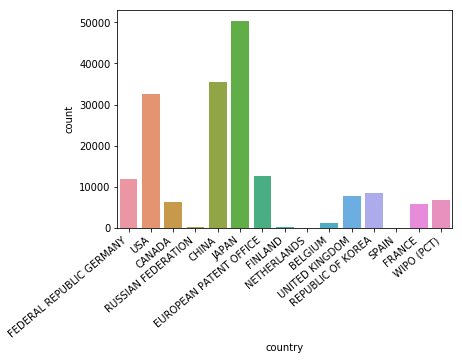

In [20]:
#plot of patent release by countrywise. Japan has max no of patents and Netherlands the least number
g = sns.countplot((patent['country']))
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")

In [0]:

#removing the - from publication number column
patent['publication_number'] = patent['publication_number'].str.replace(r"-","")

In [22]:
patent.head(10)

,publication_number,title,top_terms,country,publication_description
20613,DE119770C,,[],FEDERAL REPUBLIC GERMANY,Patent
20614,DE186623C,,[],FEDERAL REPUBLIC GERMANY,Patent
20615,US5334537A,Direct immunoassay using pH-sensitive fluoroch...,"[antibody, antigen, binding, ph, label, pair, ...",USA,Patent
20616,US2001276A,Laminated cellulose unit and processes of maki...,"[cellulosic, material, oxycellulose, viscose, ...",USA,Patent
20617,US4960818A,Polymer composite preform and process for prod...,"[powder, metal, peek, preform, particles, comp...",USA,Patent
20618,US5853914A,Rechargeable lithium battery having a specific...,"[battery, lithium, polymer, gel, material, rec...",USA,Patent
20619,CA2160062C,Vertical arrangement fluidized/non-fluidized b...,"[bed, cooling, fluidized, solids, material, pa...",CANADA,Patent
20620,US248038A,Automatic fire-extinguisher,"[distributer, cover, solder, heat, action, met...",USA,Patent
20621,US558880A,Apparatus for raising water or other liquids,"[valve, compartment, liquid, passage, pipe, pr...",USA,Patent
20622,US2252373A,Clutch,"[gear, member, plate, movement, axial, away, e...",USA,Patent


In [0]:
#importing NLP library
import nltk

In [24]:
#importing stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import string
from nltk.corpus import stopwords

In [0]:
#stopwords.words('english')

In [0]:
def text_process(topic):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in topic if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [0]:
#importing neccessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [29]:
#convert a collection of text to a matrix of token counts
bow_transformer = CountVectorizer(analyzer=text_process).fit(patent['publication_description'])
print('total number of vocab words:',len(bow_transformer.vocabulary_))
patent_bow = bow_transformer.transform(patent['publication_description'])
print('Shape of Sparse Matrix: ', patent_bow.shape)
print('Amount of Non-Zero occurences: ', patent_bow.nnz)

total number of vocab words: 52
Shape of Sparse Matrix:  (179760, 52)
Amount of Non-Zero occurences:  611458


In [0]:
#Weigh the counts and normalize the vectors to unit length, to abstract from the original text length
tfidf_transformer = TfidfTransformer().fit(patent_bow)
patent_tfidf = tfidf_transformer.transform(patent_bow)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_d

Text(0.5, 1.0, 'DB score vs cluster size')

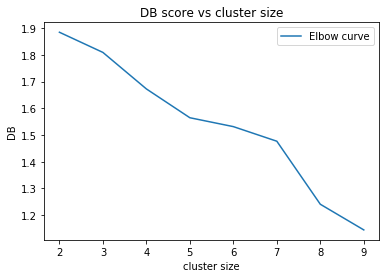

In [31]:
results = []
num_clusters = np.arange(2,10)
for size in num_clusters:
    model = KMeans(n_clusters = size).fit(patent_tfidf)
    predictions = model.predict(patent_tfidf)
    results.append(davies_bouldin_score(patent_tfidf.toarray(), predictions))

plt.plot(num_clusters, results, label="Elbow curve")
plt.ylabel("DB")
plt.xlabel("cluster size")
#plt.gca().invert_xaxis()
plt.legend()
plt.title('DB score vs cluster size')

In [0]:
# Use davies_bouldin_score to find optimal number of clusters to segment the data
#num_clusters = np.arange(2,10)
#results = {}
#for size in num_clusters:
#    model = KMeans(n_clusters = size).fit(patent_tfidf)
#    predictions = model.predict(patent_tfidf)
#    results[size] = davies_bouldin_score(patent_tfidf.toarray(), predictions)
  

#best_size = max(results, key=results.get)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_di

In [0]:
#print('The ideal number of clusters to be used based on DB index is {}:'.format(best_size))

In [0]:
#fitting kmeans clustering with 5 clusters
kmeans = KMeans(n_clusters = 5)
kmeans.fit(patent_tfidf)
pred = kmeans.predict(patent_tfidf)

In [50]:
#Estimating DB index for 5 clusters
DBscore = davies_bouldin_score(patent_tfidf.toarray(), pred)
print('The DB index is',DBscore)

The DB index is 1.5645426868249193


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [0]:
#adding the predicted labels as a column to the patent dataset to find out the data points in each cluster
patent['cls'] = pred

In [36]:
#the types of publication in cluster 0
patent[patent['cls']==0]['publication_description'].value_counts()

International application published with international search report    5428
Publication of application with search report                           4804
Doc. laid open (first publication)                                      3646
Granted EP number in Bulletin                                           2150
Publication of application without search report                        2010
Separately published search report                                      1354
Laid open (first publication)                                           1276
Later publication of ISR with revised front page                        1204
Separately published supplemental search report                         1102
Name: publication_description, dtype: int64

In [37]:
print('The total no of patents in the first cluster', sum(patent['cls']==0))

The total no of patents in the first cluster 22974


In [38]:
#patent dataset belonging to cluster 0
patent[patent['cls']==0]

,publication_number,title,top_terms,country,publication_description,cls
95941,DE69634233D1,Mass production of chips with coated selective...,[],FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0
95942,DE59309304D1,Against unauthorized copying protected substra...,[],FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0
95943,DE59309663D1,Shelf shelves,[],FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0
95944,DE502004002904D1,"Method and arrangement for video coding, the v...",[],FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0
95945,DE3661254D1,Plastic transport and storage crate,"[wall, plate, closed, half, crate, plastic, fr...",FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0
95946,DE3670244D1,System for limiting the rolling motion of a ve...,[],FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0
95947,DE3877611D1,Sprouting products for potatoes.,"[storage, oil, ml, kg, times, days, mt, applie...",FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0
95948,DE602005013099D1,Apparatus and method for supporting memory man...,[],FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0
95949,DE602005014942D1,A process for preparing aryl- and heteroarylal...,[],FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0
95950,DE69508377D1,Security label with an arc-shaped channel and ...,[],FEDERAL REPUBLIC GERMANY,Granted EP number in Bulletin,0


[Text(0, 0, 'Granted EP number in Bulletin'),
 Text(0, 0, 'Laid open (first publication)'),
 Text(0, 0, 'Doc. laid open (first publication)'),
 Text(0, 0, 'Separately published search report'),
 Text(0, 0, 'Publication of application with search report'),
 Text(0, 0, 'Separately published supplemental search report'),
 Text(0, 0, 'Later publication of ISR with revised front page'),
 Text(0, 0, 'Publication of application without search report'),
 Text(0, 0, 'International application published with international search report')]

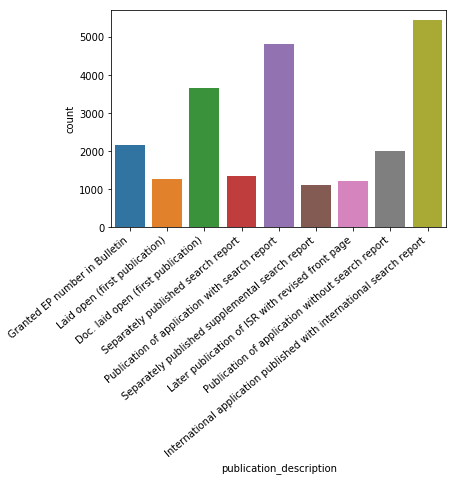

In [39]:

#count plot for patents in cluster 0
g = sns.countplot(patent[patent['cls']==0]['publication_description'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")

In [40]:
# the patents in the cluster 1
patent[patent['cls']==1]['publication_description'].value_counts()

Patent                                                         18723
Patent application publication                                 10853
Patent ( having previously published pre-grant publication)     6233
Patent specification                                            5173
Patent of invention ( First publication)                        2641
Patent ( no pre-grant publication)                              1492
Patent of invention ( Second publication)                       1304
Patent undefined                                                1208
Granted Patent                                                  1207
Name: publication_description, dtype: int64

In [41]:
print('The total no of patents in the second cluster', sum(patent['cls']==1))

The total no of patents in the second cluster 48834


In [42]:
#patent dataset belonging to cluster 1
patent[patent['cls']==1]

,publication_number,title,top_terms,country,publication_description,cls
20613,DE119770C,,[],FEDERAL REPUBLIC GERMANY,Patent,1
20614,DE186623C,,[],FEDERAL REPUBLIC GERMANY,Patent,1
20615,US5334537A,Direct immunoassay using pH-sensitive fluoroch...,"[antibody, antigen, binding, ph, label, pair, ...",USA,Patent,1
20616,US2001276A,Laminated cellulose unit and processes of maki...,"[cellulosic, material, oxycellulose, viscose, ...",USA,Patent,1
20617,US4960818A,Polymer composite preform and process for prod...,"[powder, metal, peek, preform, particles, comp...",USA,Patent,1
20618,US5853914A,Rechargeable lithium battery having a specific...,"[battery, lithium, polymer, gel, material, rec...",USA,Patent,1
20619,CA2160062C,Vertical arrangement fluidized/non-fluidized b...,"[bed, cooling, fluidized, solids, material, pa...",CANADA,Patent,1
20620,US248038A,Automatic fire-extinguisher,"[distributer, cover, solder, heat, action, met...",USA,Patent,1
20621,US558880A,Apparatus for raising water or other liquids,"[valve, compartment, liquid, passage, pipe, pr...",USA,Patent,1
20622,US2252373A,Clutch,"[gear, member, plate, movement, axial, away, e...",USA,Patent,1


[Text(0, 0, 'Patent'),
 Text(0, 0, 'Granted Patent'),
 Text(0, 0, 'Patent undefined'),
 Text(0, 0, 'Patent specification'),
 Text(0, 0, 'Patent application publication'),
 Text(0, 0, 'Patent ( no pre-grant publication)'),
 Text(0, 0, 'Patent of invention ( First publication)'),
 Text(0, 0, 'Patent of invention ( Second publication)'),
 Text(0, 0, 'Patent ( having previously published pre-grant publication)')]

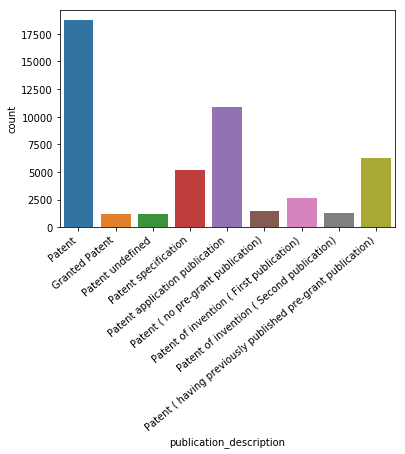

In [43]:
#count plot of patents in cluster 1
g = sns.countplot(patent[patent['cls']==1]['publication_description'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")

In [44]:
#the patents in the cluster 2
patent[patent['cls']==2]['publication_description'].value_counts()

Published unexamined patent application                                         25444
Published granted patent (Second level)                                          7636
Granted patent                                                                   6227
Official gazette of the unexamined patents                                       4758
Granted patent for invention                                                     4508
Published patent application                                                     4391
Laid-open patent application                                                     2736
Published examined patent application (Second level)                             2702
Application for patent                                                           1908
Application for patent of invention ( First publication)                         1878
Published unexamined patent application (based on international application)     1810
Design patent                                         

In [45]:
print('The total no of patents in the third cluster', sum(patent['cls']==2))

The total no of patents in the third cluster 65110


In [46]:
#patent dataset belonging to cluster 2
patent[patent['cls']==2]

,publication_number,title,top_terms,country,publication_description,cls
39336,USD344623S,Medical dress sock,"[fig, view, elevational, sock, dress, medical,...",USA,Design patent,2
39337,USD426579S,Publication dispenser,"[fig, view, side, publication, elevation, disp...",USA,Design patent,2
39338,USD611795S,Portable electric sander,"[fig, view, electric, side, sander, portable, ...",USA,Design patent,2
39339,USD603890S,Glasses,"[view, fig, side, perspective, glasses, plan, ...",USA,Design patent,2
39340,USD649390S,Beverage maker,"[fig, view, maker, beverage, elevational, pers...",USA,Design patent,2
39341,USD768132S,,[],USA,Design patent,2
39342,USD330154S,Alternator bracket,"[fig, view, elevational, bracket, alternator, ...",USA,Design patent,2
39343,USD611765S,Beverage container,"[fig, view, elevational, side, top, right, pla...",USA,Design patent,2
39344,USD737937S,Sink mixer,"[fig, mixer, sink, view, top, invention, prese...",USA,Design patent,2
39345,USD334905S,Corsage and boutonniere fastener,"[fig, view, corsage, boutonniere, fastener, de...",USA,Design patent,2


[Text(0, 0, 'Design patent'),
 Text(0, 0, 'Granted patent'),
 Text(0, 0, 'Application for patent'),
 Text(0, 0, 'Laid-open patent application'),
 Text(0, 0, 'Published patent application'),
 Text(0, 0, 'Granted patent for invention '),
 Text(0, 0, 'Published granted patent (Second level)'),
 Text(0, 0, 'Published unexamined patent application'),
 Text(0, 0, 'Official gazette of the unexamined patents'),
 Text(0, 0, 'Published examined patent application (Second level)'),
 Text(0, 0, 'Application for patent of invention ( First publication)'),
 Text(0, 0, 'Published unexamined patent application (based on international application)')]

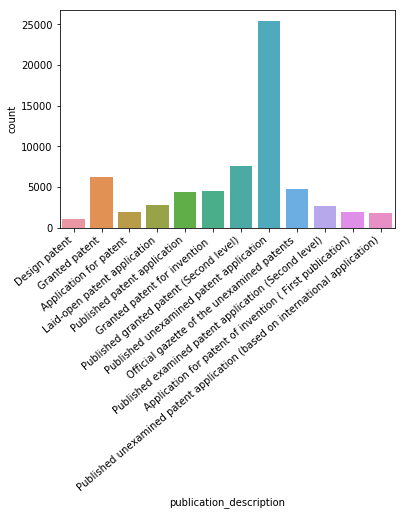

In [47]:
#count plot of patents in cluster 2
g = sns.countplot(patent[patent['cls']==2]['publication_description'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, 'Utility model '),
 Text(0, 0, 'Granted utility model'),
 Text(0, 0, 'Registered utility model'),
 Text(0, 0, 'Published unexamined utility model application'),
 Text(0, 0, 'Published utility model registration (Second level)')]

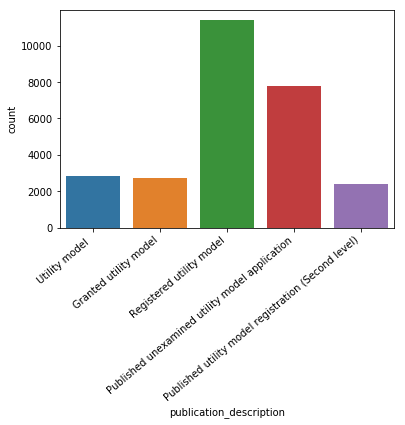

In [48]:
#count plot of patents in cluster 4
g = sns.countplot(patent[patent['cls']==3]['publication_description'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, 'Unexaminded application')]

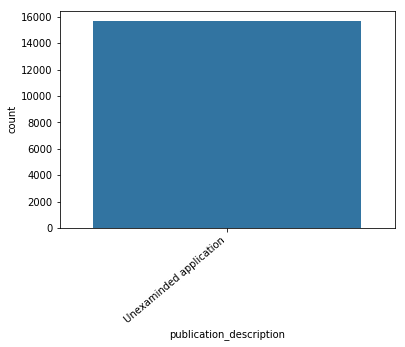

In [49]:
#count plot of patents in cluster 4
g = sns.countplot(patent[patent['cls']==4]['publication_description'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")